This notebook shows how to use a trained model on new samples.  It is assumed that we have generated a set of answers to the  image and questions in the VQA format. 

In [ ]:
# First, me make some imports
import json
import numpy as np
from scipy import misc

# Plot libraries
import matplotlib as mpl
mpl.use('Agg') # run matplotlib without X server (GUI)
import matplotlib.pyplot as plt
%matplotlib inline

# Parameters: 
results_file = 'trained_models/MultiEmbedding_Glove_Bidirectional_VQA_Model_FusionLast_txtemb_300_imgemb_500_sum_lstm_500_[]_tok/test_sampling_5.json'
questions_path = '/media/HDD_2TB/DATASETS/VQA/Questions/OpenEnded_mscoco_test2015_questions.json'
images_path = '/media/HDD_2TB/DATASETS/VQA/Images/mscoco/test2015'
set_prefix = 'COCO_test2015_'
imgs_format = '.jpg'

n_show = 6

In [73]:
# Read data
ans = json.load(open(results_file, 'r'))
qst = json.load(open(questions_path, 'r'))['questions']

In [117]:
def plot_data(images_path, imgs, questions, answers):
    num_show = len(imgs)
    per_row = 3

    n_rows = int(np.ceil(num_show/per_row))
    f = plt.figure(1)
    f.set_size_inches(7*n_rows, 4*per_row)
    for c in range(num_show):
        im = imgs[c]
        im = misc.imread(images_path+'/'+im)
        ax = plt.subplot(n_rows,per_row,c+1)
        plt.imshow(im)
        plt.gca().xaxis.set_major_locator(plt.NullLocator())
        plt.gca().yaxis.set_major_locator(plt.NullLocator())

        text = ''
        text += 'I: %s\n' % imgs[c]
        text += 'Q: %s\n' % questions[c]['question']
        text += 'A: %s\n' % answers[c]['answer']
        text += '\n'
        plt.xlabel(text, fontsize=14)

In [198]:
# Select some samples randomly
chosen = np.random.choice(range(len(res)), n_show, replace=False)

# Retrieve chosen triplets (img, qst, ans)
answers = [ans[c] for c in chosen]
questions = []
images = []
for a in answers:
    id = a['question_id']
    found = False
    i = 0
    while not found:
        if(qst[i]['question_id'] == id):
            questions.append(qst[i])
            found = True
        i += 1
for q in questions:
    im = set_prefix+"%0.12d"+imgs_format
    im = im % q['image_id']
    images.append(im)

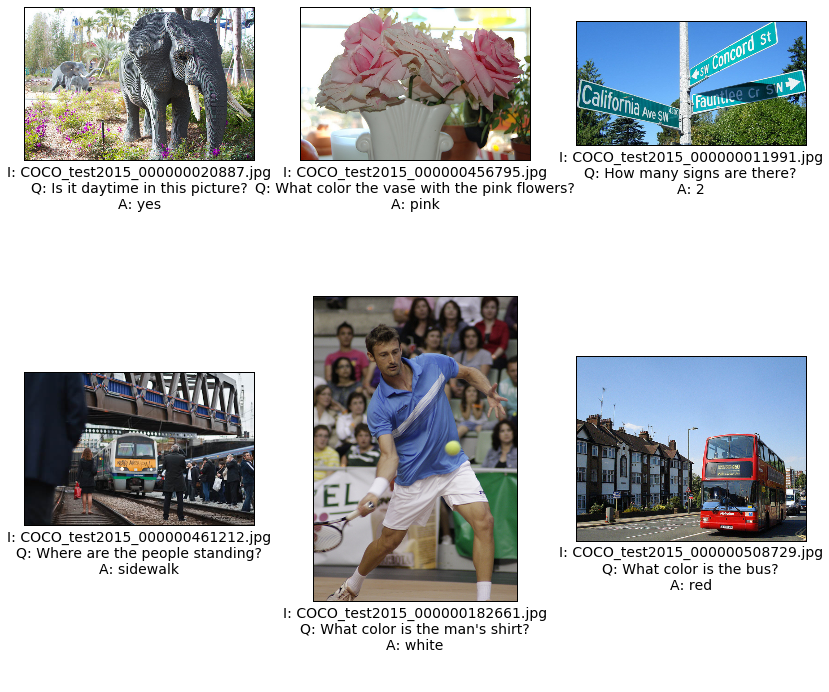

In [199]:
plot_data(images_path, images, questions, answers)